<h1>Import essensital library</h1>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Read data</h1>

In [60]:
data = pd.read_csv("tvmarketing.csv")

<h1>Visualize the data</h1>

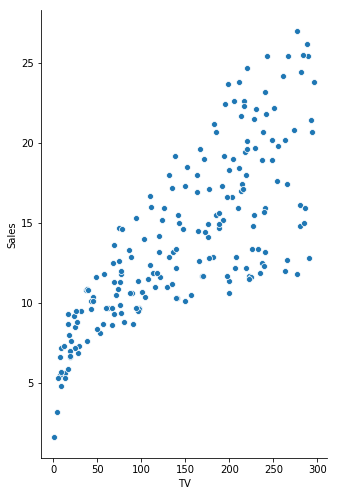

In [50]:
sns.pairplot(data, x_vars=['TV'], y_vars=['Sales'], height=7, aspect=.7, kind='scatter')

<h1>Devide the Dependent & Independent variable</h1>

In [62]:
x = np.array(data['TV'])
y = np.array(data['Sales'])

<h1>Import scikit learn library for separating the Train data & Test data</h1>

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

<h1>Linear Regression part</h1>

In [91]:
# y = mx + c part
x_squar_mean = np.mean(x_train**2)
xy_mean = np.mean(x_train * y_train)
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
x_mean_squar = np.mean(x_train) ** 2 
m = ((x_mean * y_mean) - xy_mean) / (x_mean_squar - x_squar_mean)
c = y_mean - (m * x_mean)
print("Intercept: ", c)
print("Coefficient: ", m)
    

Intercept:  6.98966585741168
Coefficient:  0.04649735874786576


<h1>Predict the sales value using Linear Regression Model</h1>

In [93]:
# Pridict part
y_predict = []
for x in x_test:
    y = m * x + c
    y_predict.append(y)

y_predict = np.array(y_predict)

<h1>Export the predicted data to a csv file</h1>

In [94]:
y_pred = pd.DataFrame(data = y_predict, columns=['Sales'])
y_pred.to_csv('predict.csv', encoding='utf-8', index=False)

<h1>Visualize the Train data</h1>

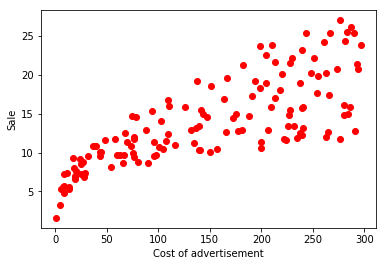

In [95]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Cost of advertisement')
plt.ylabel('Sale')
plt.show()

<h1>Visualize the predicted data</h1>

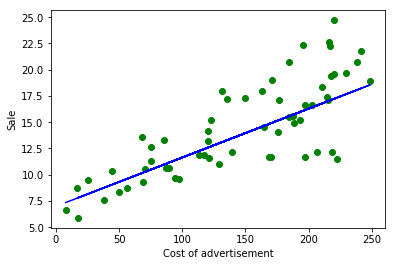

In [109]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,y_pred, color='blue')
dataframe_new = pd.DataFrame(y_pred)
plt.xlabel('Cost of advertisement')
plt.ylabel('Sale')
plt.show()

<h1>Actual & Predicted data visualization</h1>

Text(0,0.5,'Sales')

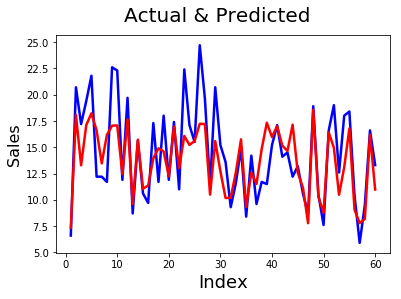

In [110]:
c = [i for i in range(1,61,1)] #generating index
fig =  plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_predict, color="red", linewidth=2.5, linestyle="-")
fig.suptitle('Actual & Predicted', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

<h1>R-Squared Value </h1>

In [108]:
up_sum = 0
down_sum = 0
y_test_mean = np.mean(y_test)
for y in y_predict:
    up_sum = up_sum + (y - y_test_mean) ** 2
    
for y in y_test:
    down_sum = down_sum + (y - y_test_mean) ** 2
    
R_squared = up_sum / down_sum
print(R_squared)

0.5126084390813113
